In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

In [7]:
df = pd.read_csv("C:/Users/User/Desktop/Data-Visualization/homework_3_weather_check_week4/weather-check.csv")

In [8]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [9]:
df = df.drop(df[df['Age'] == '-'].index)
df = df.drop(df[df['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == '-'].index)


In [10]:
df['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts()

Very likely          362
Somewhat likely      273
Very unlikely        208
Somewhat unlikely     73
Name: If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?, dtype: int64

In [11]:
myCoding = {"Somewhat likely":3, "Somewhat unlikely":2, "Very likely":4, "Very unlikely":1}

In [12]:
myOrd = df.iloc[:,4].replace(myCoding)
myOrd.value_counts()

4    362
3    273
1    208
2     73
Name: If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?, dtype: int64

In [13]:
df.iloc[:,1].value_counts()

Yes    739
No     177
Name: Do you typically check a daily weather report?, dtype: int64

In [14]:
myCat1 = df.iloc[:,1] == 'Yes'
myCat2 = df.iloc[:,1] == "No"

In [15]:
myCatScores1 = myOrd[myCat1].dropna()
myCatScores2 = myOrd[myCat2].dropna()

In [16]:
myFreq1 = myCatScores1.value_counts()
myFreq2 = myCatScores2.value_counts()

In [17]:
plotdata = pd.DataFrame({'Yes':myFreq1, "No": myFreq2})
plotdata.head()

,Yes,No
1,155,53
2,48,25
3,202,71
4,334,28


<AxesSubplot:>

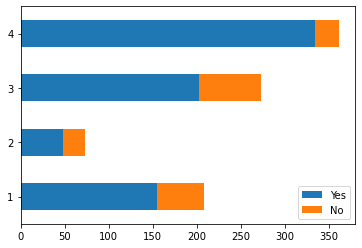

In [18]:
plotdata.plot(kind = 'barh', stacked=True)

In [19]:
plotdata2 = plotdata.transpose()

color = ['#e7b99a','#ffdaa1', '#c8dd9b','#95bd9c']

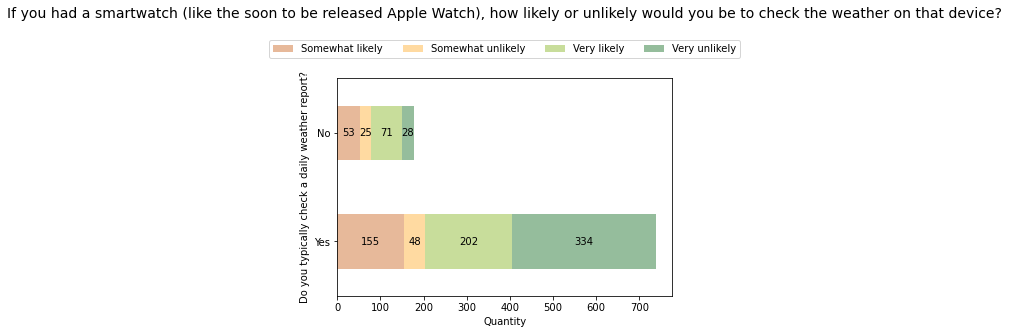

In [28]:
ax = plotdata2.plot(kind='barh', stacked = True, color = color)
plt.legend(myCoding, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=True)
plt.title('If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',size=14, y=1.25)
plt.ylabel("Do you typically check a daily weather report?")
plt.xlabel("Quantity")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');


In [21]:
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis = 0)*100
plotdata3

,1,2,3,4
Yes,20.974290,6.495264,27.334235,45.196211
No,29.943503,14.124294,40.112994,15.819209


In [22]:
plotdata3.iloc[1]

1    29.943503
2    14.124294
3    40.112994
4    15.819209
Name: No, dtype: float64

In [23]:
sum(plotdata3.iloc[0])

100.0

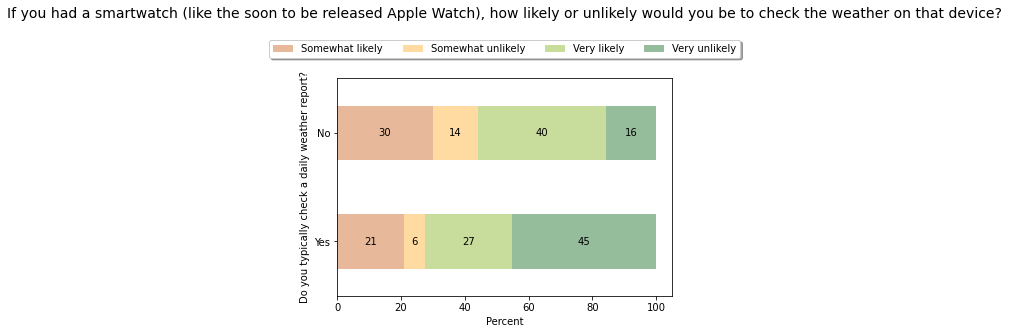

In [26]:
ax = plotdata3.plot(kind='barh', stacked = True, color = color)
color = ['#e7b99a','#ffdaa1', '#c8dd9b','#95bd9c']
plt.legend(myCoding, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5,  shadow=True)
plt.title('If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',size=14, y=1.25)
plt.ylabel("Do you typically check a daily weather report?")
plt.xlabel("Percent")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

Text(0.5, 1.0, 'description')

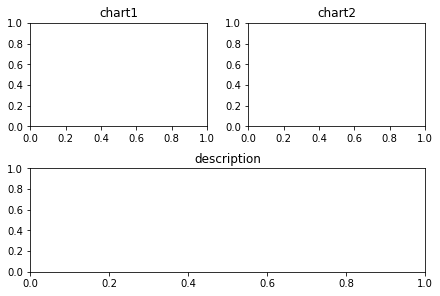

In [76]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
f_ax1 = fig.add_subplot(gs[0, 0])
f_ax1.set_title('chart1')
f_ax2 = fig.add_subplot(gs[0, 1])
f_ax2.set_title('chart2')
f_ax3 = fig.add_subplot(gs[1, :])
f_ax3.set_title('description')